In [34]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Import the data file and remove columns that aren't needed ##
data = pd.read_csv('weatherDataAll.csv', sep=",")

In [35]:
# Columns in dataset #
#Average Dew Point - DEWP
#Average Sea Level Pressure - SLP
#Average Station Pressure - STP
#Average Temperature - TEMP
#Average Visibility - VISIB
#Average Wind Speed - WDSP
#Indicators
#Maximum Sustained Wind Speed - MXSPD
#Maximum Temperature - MAX
#Maximum Wind Gust - GUST
#Minimum Temperature - MIN
#Precipitation - PRCP
#Snow Depth - SNDP

data.head()

STATION    DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  72539514833  1/1/88   42.2667  -84.46670      304.2   
1  72637014826  1/1/88   42.9666  -83.74940      234.7   
2  72537094847  1/1/88   42.2313  -83.33080      192.3   
3  72635094860  1/1/88   42.8825  -85.52389      244.8   
4  72637699999  1/1/88   43.0000  -82.42000      177.0   

                                                NAME  TEMP  TEMP_ATTRIBUTES  \
0                      JACKSON REYNOLDS FIELD, MI US  15.7               17   
1                                 FLINT FCWOS, MI US  20.0               24   
2                       DETROIT METRO AIRPORT, MI US  20.4               24   
3  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8               24   
4              PORT HURON COAST GUARD STATION, MI US  18.5               11   

     DEWP  DEWP_ATTRIBUTES   ...    MXSPD   GUST   MAX  MAX_ATTRIBUTES   MIN  \
0     8.1               17   ...     15.0   25.1  37.0                  11.1   
1    11.0               24   ...     20.0   24.1  37.9                  15.1   
2    10.6               24   ...     21.0   28.0  39.2                  15.1   
3    12.5               24   ...     22.0   27.0  24.1               *  12.9   
4  9999.9                0   ...     25.8  999.9  28.0               *  13.1   

   MIN_ATTRIBUTES   PRCP  PRCP_ATTRIBUTES   SNDP  FRSHTT  
0               *   0.01                C    5.9    1000  
1                   0.00                D    0.4    1000  
2               *   0.00                D    2.4    1000  
3                   0.04                G    5.1    1000  
4               *  99.99                   999.9    1000  

[5 rows x 28 columns]

In [36]:
# drop un-needed columns in the dataset that won't really affect my linear regression prediction #
drop_col = [0, 2, 3, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27]

data.drop(data.columns[drop_col],axis=1,inplace=True)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD   GUST   MAX   MIN   PRCP   SNDP  
0     8.1  1026.2  999.9    4.5  11.4   15.0   25.1  37.0  11.1   0.01    5.9  
1    11.0  1023.0  993.9    7.2  16.2   20.0   24.1  37.9  15.1   0.00    0.4  
2    10.6  1024.3  999.0   13.2  16.4   21.0   28.0  39.2  15.1   0.00    2.4  
3    12.5  1024.4  993.6    3.1  17.4   22.0   27.0  24.1  12.9   0.04    5.1  
4  9999.9  1018.9  999.9    7.1  15.1   25.8  999.9  28.0  13.1  99.99  999.9

In [37]:
## First thing to do is remove any rows that have a missing mean temperature value ##
print(data.shape)
rows = []
for d in range(0,len(data["TEMP"])):
    if(data["TEMP"][d] == 9999.9):
        rows.append(d)
        
data.drop(data.index[rows], inplace=True)
print(data.shape)

(126385, 15)
(126385, 15)


In [38]:
# change all missing/not reported precipitation to zero '99.99' -> '0.00' 
for d in range(0,len(data["PRCP"])):
    if(99.99 == data["PRCP"][d]):
        data.at[d, 'PRCP'] = 0.00
    
data['PRCP'] = pd.to_numeric(data['PRCP'])
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD   GUST   MAX   MIN  PRCP   SNDP  
0     8.1  1026.2  999.9    4.5  11.4   15.0   25.1  37.0  11.1  0.01    5.9  
1    11.0  1023.0  993.9    7.2  16.2   20.0   24.1  37.9  15.1  0.00    0.4  
2    10.6  1024.3  999.0   13.2  16.4   21.0   28.0  39.2  15.1  0.00    2.4  
3    12.5  1024.4  993.6    3.1  17.4   22.0   27.0  24.1  12.9  0.04    5.1  
4  9999.9  1018.9  999.9    7.1  15.1   25.8  999.9  28.0  13.1  0.00  999.9

In [39]:
# change all missing/not reported snow depth to zero '999.99' -> '0.00' 
for d in range(0,len(data["SNDP"])):
    if(999.9 == data["SNDP"][d]):
        data.at[d, 'SNDP'] = 0.00
    
data['SNDP'] = pd.to_numeric(data['SNDP'])
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD   GUST   MAX   MIN  PRCP  SNDP  
0     8.1  1026.2  999.9    4.5  11.4   15.0   25.1  37.0  11.1  0.01   5.9  
1    11.0  1023.0  993.9    7.2  16.2   20.0   24.1  37.9  15.1  0.00   0.4  
2    10.6  1024.3  999.0   13.2  16.4   21.0   28.0  39.2  15.1  0.00   2.4  
3    12.5  1024.4  993.6    3.1  17.4   22.0   27.0  24.1  12.9  0.04   5.1  
4  9999.9  1018.9  999.9    7.1  15.1   25.8  999.9  28.0  13.1  0.00   0.0

In [40]:
## Clean up Mean Sea Level Pressure (SLP) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["SLP"])):
    if(data["SLP"][d] == 9999.9):
        values_to_change.append(d)
    else:
        row_sum += data["SLP"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "SLP"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD   GUST   MAX   MIN  PRCP  SNDP  
0     8.1  1026.2  999.9    4.5  11.4   15.0   25.1  37.0  11.1  0.01   5.9  
1    11.0  1023.0  993.9    7.2  16.2   20.0   24.1  37.9  15.1  0.00   0.4  
2    10.6  1024.3  999.0   13.2  16.4   21.0   28.0  39.2  15.1  0.00   2.4  
3    12.5  1024.4  993.6    3.1  17.4   22.0   27.0  24.1  12.9  0.04   5.1  
4  9999.9  1018.9  999.9    7.1  15.1   25.8  999.9  28.0  13.1  0.00   0.0

In [41]:
## Clean up Average Wind Speed (WDSP) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["WDSP"])):
    if(data["WDSP"][d] == 999.9):
        values_to_change.append(d)
    else:
        row_sum += data["WDSP"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "WDSP"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD   GUST   MAX   MIN  PRCP  SNDP  
0     8.1  1026.2  999.9    4.5  11.4   15.0   25.1  37.0  11.1  0.01   5.9  
1    11.0  1023.0  993.9    7.2  16.2   20.0   24.1  37.9  15.1  0.00   0.4  
2    10.6  1024.3  999.0   13.2  16.4   21.0   28.0  39.2  15.1  0.00   2.4  
3    12.5  1024.4  993.6    3.1  17.4   22.0   27.0  24.1  12.9  0.04   5.1  
4  9999.9  1018.9  999.9    7.1  15.1   25.8  999.9  28.0  13.1  0.00   0.0

In [42]:
## Clean up Max Wind GUST (GUST) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["GUST"])):
    if(data["GUST"][d] == 999.9):
        values_to_change.append(d)
    else:
        row_sum += data["GUST"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "GUST"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  PRCP  \
0     8.1  1026.2  999.9    4.5  11.4   15.0  25.100000  37.0  11.1  0.01   
1    11.0  1023.0  993.9    7.2  16.2   20.0  24.100000  37.9  15.1  0.00   
2    10.6  1024.3  999.0   13.2  16.4   21.0  28.000000  39.2  15.1  0.00   
3    12.5  1024.4  993.6    3.1  17.4   22.0  27.000000  24.1  12.9  0.04   
4  9999.9  1018.9  999.9    7.1  15.1   25.8  22.775544  28.0  13.1  0.00   

   SNDP  
0   5.9  
1   0.4  
2   2.4  
3   5.1  
4   0.0

In [43]:
## Clean up Max Wind Speed (MXSPD) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["MXSPD"])):
    if(data["MXSPD"][d] == 999.9):
        values_to_change.append(d)
    else:
        row_sum += data["MXSPD"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "MXSPD"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

     DEWP     SLP    STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  PRCP  \
0     8.1  1026.2  999.9    4.5  11.4   15.0  25.100000  37.0  11.1  0.01   
1    11.0  1023.0  993.9    7.2  16.2   20.0  24.100000  37.9  15.1  0.00   
2    10.6  1024.3  999.0   13.2  16.4   21.0  28.000000  39.2  15.1  0.00   
3    12.5  1024.4  993.6    3.1  17.4   22.0  27.000000  24.1  12.9  0.04   
4  9999.9  1018.9  999.9    7.1  15.1   25.8  22.775544  28.0  13.1  0.00   

   SNDP  
0   5.9  
1   0.4  
2   2.4  
3   5.1  
4   0.0

In [44]:
## Clean up Mean Dew Point (DEWP) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["DEWP"])):
    if(data["DEWP"][d] == 9999.9):
        values_to_change.append(d)
    else:
        row_sum += data["DEWP"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "DEWP"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

        DEWP     SLP    STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  PRCP  \
0   8.100000  1026.2  999.9    4.5  11.4   15.0  25.100000  37.0  11.1  0.01   
1  11.000000  1023.0  993.9    7.2  16.2   20.0  24.100000  37.9  15.1  0.00   
2  10.600000  1024.3  999.0   13.2  16.4   21.0  28.000000  39.2  15.1  0.00   
3  12.500000  1024.4  993.6    3.1  17.4   22.0  27.000000  24.1  12.9  0.04   
4  39.471916  1018.9  999.9    7.1  15.1   25.8  22.775544  28.0  13.1  0.00   

   SNDP  
0   5.9  
1   0.4  
2   2.4  
3   5.1  
4   0.0

In [45]:
## Clean up Mean Station Pressure (STP) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["STP"])):
    if(data["STP"][d] == 999.9):
        values_to_change.append(d)
    else:
        row_sum += data["STP"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "STP"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

        DEWP     SLP         STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  \
0   8.100000  1026.2  903.401397    4.5  11.4   15.0  25.100000  37.0  11.1   
1  11.000000  1023.0  993.900000    7.2  16.2   20.0  24.100000  37.9  15.1   
2  10.600000  1024.3  999.000000   13.2  16.4   21.0  28.000000  39.2  15.1   
3  12.500000  1024.4  993.600000    3.1  17.4   22.0  27.000000  24.1  12.9   
4  39.471916  1018.9  903.401397    7.1  15.1   25.8  22.775544  28.0  13.1   

   PRCP  SNDP  
0  0.01   5.9  
1  0.00   0.4  
2  0.00   2.4  
3  0.04   5.1  
4  0.00   0.0

In [46]:
## Clean up Average Visibility (VISIB) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["VISIB"])):
    if(data["VISIB"][d] == 999.9):
        values_to_change.append(d)
    else:
        row_sum += data["VISIB"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "VISIB"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

        DEWP     SLP         STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  \
0   8.100000  1026.2  903.401397    4.5  11.4   15.0  25.100000  37.0  11.1   
1  11.000000  1023.0  993.900000    7.2  16.2   20.0  24.100000  37.9  15.1   
2  10.600000  1024.3  999.000000   13.2  16.4   21.0  28.000000  39.2  15.1   
3  12.500000  1024.4  993.600000    3.1  17.4   22.0  27.000000  24.1  12.9   
4  39.471916  1018.9  903.401397    7.1  15.1   25.8  22.775544  28.0  13.1   

   PRCP  SNDP  
0  0.01   5.9  
1  0.00   0.4  
2  0.00   2.4  
3  0.04   5.1  
4  0.00   0.0

In [47]:
## Clean up Min Temp (Min) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["MIN"])):
    if(data["MIN"][d] == 9999.9):
        values_to_change.append(d)
    else:
        row_sum += data["MIN"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "MIN"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

        DEWP     SLP         STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  \
0   8.100000  1026.2  903.401397    4.5  11.4   15.0  25.100000  37.0  11.1   
1  11.000000  1023.0  993.900000    7.2  16.2   20.0  24.100000  37.9  15.1   
2  10.600000  1024.3  999.000000   13.2  16.4   21.0  28.000000  39.2  15.1   
3  12.500000  1024.4  993.600000    3.1  17.4   22.0  27.000000  24.1  12.9   
4  39.471916  1018.9  903.401397    7.1  15.1   25.8  22.775544  28.0  13.1   

   PRCP  SNDP  
0  0.01   5.9  
1  0.00   0.4  
2  0.00   2.4  
3  0.04   5.1  
4  0.00   0.0

In [48]:
## Clean up Max Temp (Max) ##
rows = []
N = 0
row_sum = 0
values_to_change = []
for d in range(0,len(data["MAX"])):
    if(data["MAX"][d] == 9999.9):
        values_to_change.append(d)
    else:
        row_sum += data["MAX"][d]
        #rows.append(d)
        N+=1

for d in range(0, len(values_to_change)):
    data.at[values_to_change[d], "MAX"]= str(row_sum/N)
data.head()

DATE  ELEVATION                                               NAME  TEMP  \
0  1/1/88      304.2                      JACKSON REYNOLDS FIELD, MI US  15.7   
1  1/1/88      234.7                                 FLINT FCWOS, MI US  20.0   
2  1/1/88      192.3                       DETROIT METRO AIRPORT, MI US  20.4   
3  1/1/88      244.8  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...  16.8   
4  1/1/88      177.0              PORT HURON COAST GUARD STATION, MI US  18.5   

        DEWP     SLP         STP  VISIB  WDSP  MXSPD       GUST   MAX   MIN  \
0   8.100000  1026.2  903.401397    4.5  11.4   15.0  25.100000  37.0  11.1   
1  11.000000  1023.0  993.900000    7.2  16.2   20.0  24.100000  37.9  15.1   
2  10.600000  1024.3  999.000000   13.2  16.4   21.0  28.000000  39.2  15.1   
3  12.500000  1024.4  993.600000    3.1  17.4   22.0  27.000000  24.1  12.9   
4  39.471916  1018.9  903.401397    7.1  15.1   25.8  22.775544  28.0  13.1   

   PRCP  SNDP  
0  0.01   5.9  
1  0.00   0.4  
2  0.00   2.4  
3  0.04   5.1  
4  0.00   0.0

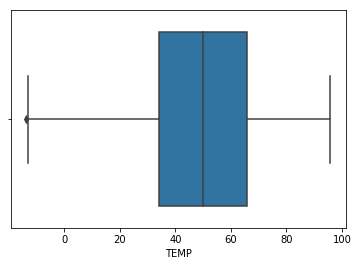

In [50]:
sns.boxplot(x=data['TEMP'])


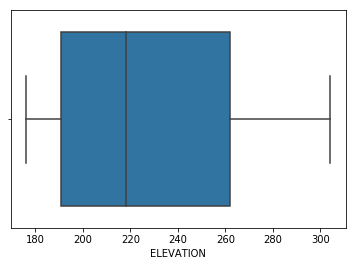

In [51]:
sns.boxplot(x=data['ELEVATION'])

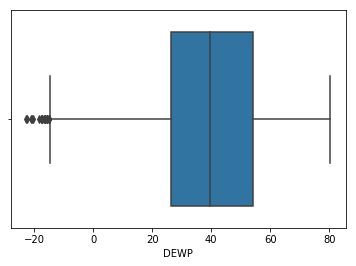

In [52]:
sns.boxplot(x=data['DEWP'])

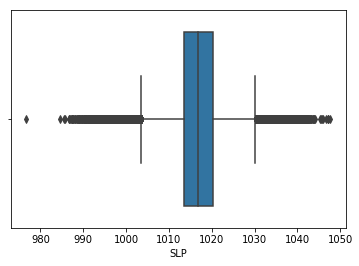

In [53]:
sns.boxplot(x=data['SLP'])

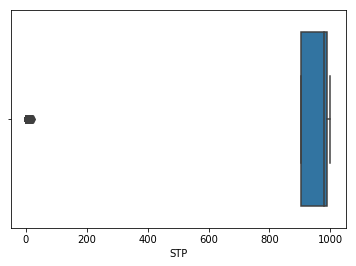

In [54]:
sns.boxplot(x=data['STP'])

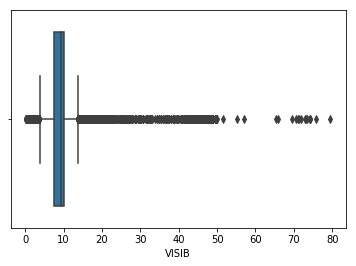

In [55]:
sns.boxplot(x=data['VISIB'])

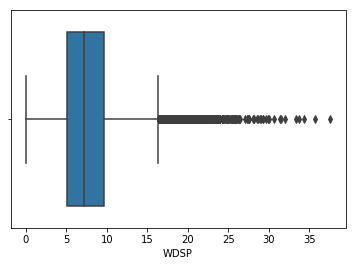

In [56]:
sns.boxplot(x=data['WDSP'])

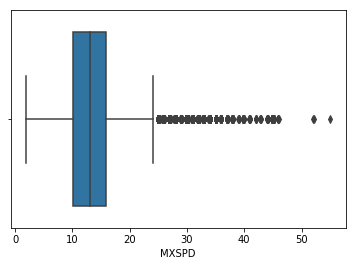

In [57]:
sns.boxplot(x=data['MXSPD'])

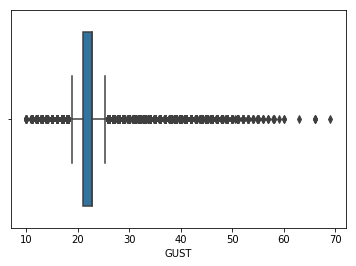

In [58]:
sns.boxplot(x=data['GUST'])

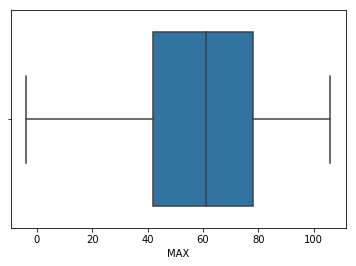

In [59]:
sns.boxplot(x=data['MAX'])

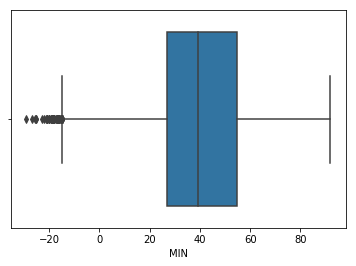

In [60]:
sns.boxplot(x=data['MIN'])

0.07540507180442449

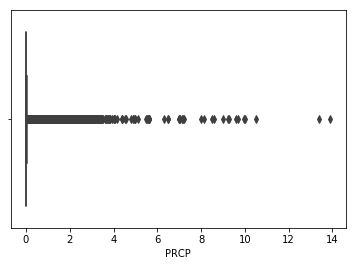

In [63]:
sns.boxplot(x=data['PRCP'])
data['PRCP'].mean()

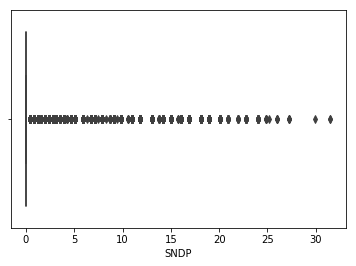

In [62]:
sns.boxplot(x=data['SNDP'])

In [49]:
# Now that I understand there are outliers I need to check where exactly these outliers
# using the IQR method with this article I followed:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

#Call describe on df and transpose it due to the large number of columns

outs = data.describe().T

# precalculate interquartile range for ease of use in next calculation
IQR = outs['75%'] - outs['25%']

# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
outs['outliers'] = (outs['min']<(outs['25%']-(3*IQR)))|(outs['max'] > (outs['75%']+3*IQR))

# just display the features containing extreme outliers
outs.loc[outs.outliers]

count         mean         std    min          25%          50%  \
SLP    126385.0  1016.857410    6.387023  976.6  1013.500000  1016.857410   
STP    126385.0   903.401397  216.984690    0.0   903.401397   979.400000   
VISIB  126385.0     9.058557    3.710161    0.2     7.500000     9.400000   
WDSP   126385.0     7.551991    3.385730    0.0     5.100000     7.200000   
MXSPD  126385.0    13.743405    4.746210    1.9    10.100000    13.000000   
GUST   126385.0    22.775544    4.367425    9.9    21.000000    22.775544   
PRCP   126385.0     0.075405    0.260876    0.0     0.000000     0.000000   
SNDP   126385.0     0.480861    1.891606    0.0     0.000000     0.000000   

               75%     max  outliers  
SLP    1020.200000  1047.7      True  
STP     989.800000   999.8      True  
VISIB    10.000000    79.5      True  
WDSP      9.600000    37.6      True  
MXSPD    15.900000    55.0      True  
GUST     22.775544    69.0      True  
PRCP      0.020000    13.9      True  
SNDP      0.000000    31.5      True

In [ ]:
# I am acknowledging the presence of outliers here, however, they fall in the cols
# that have low correlation to what I am trying to predict (TEMP). So, I have chosen
# to let them be right now because they will be eliminated later on down the page

In [19]:
## Add in the previous 3 day columns to have a 1,2,3 for each variable. Cannot predict weather for a certain day ##
## based on its own temperature readings we need the past two days. ##
N = data.shape[0]

# Start with 1
data['TEMP 1'] = data['TEMP'].shift(periods=1)
data['DEWP 1'] = data['DEWP'].shift(periods=1)
data['SLP 1'] = data['SLP'].shift(periods=1)
data['STP 1'] = data['STP'].shift(periods=1)
data['VISIB 1'] = data['VISIB'].shift(periods=1)
data['WDSP 1'] = data['WDSP'].shift(periods=1)
data['MXSPD 1'] = data['MXSPD'].shift(periods=1)
data['GUST 1'] = data['GUST'].shift(periods=1)
data['MAX 1'] = data['MAX'].shift(periods=1)
data['MIN 1'] = data['MIN'].shift(periods=1)
data['PRCP 1'] = data['PRCP'].shift(periods=1)
data['SNDP 1'] = data['SNDP'].shift(periods=1)

# 2
data['TEMP 2'] = data['TEMP'].shift(periods=2)
data['DEWP 2'] = data['DEWP'].shift(periods=2)
data['SLP 2'] = data['SLP'].shift(periods=2)
data['STP 2'] = data['STP'].shift(periods=2)
data['VISIB 2'] = data['VISIB'].shift(periods=2)
data['WDSP 2'] = data['WDSP'].shift(periods=2)
data['MXSPD 2'] = data['MXSPD'].shift(periods=2)
data['GUST 2'] = data['GUST'].shift(periods=2)
data['MAX 2'] = data['MAX'].shift(periods=2)
data['MIN 2'] = data['MIN'].shift(periods=2)
data['PRCP 2'] = data['PRCP'].shift(periods=2)
data['SNDP 2'] = data['SNDP'].shift(periods=2)

# 3
data['TEMP 3'] = data['TEMP'].shift(periods=3)
data['DEWP 3'] = data['DEWP'].shift(periods=3)
data['SLP 3'] = data['SLP'].shift(periods=3)
data['STP 3'] = data['STP'].shift(periods=3)
data['VISIB 3'] = data['VISIB'].shift(periods=3)
data['WDSP 3'] = data['WDSP'].shift(periods=3)
data['MXSPD 3'] = data['MXSPD'].shift(periods=3)
data['GUST 3'] = data['GUST'].shift(periods=3)
data['MAX 3'] = data['MAX'].shift(periods=3)
data['MIN 3'] = data['MIN'].shift(periods=3)
data['PRCP 3'] = data['PRCP'].shift(periods=3)
data['SNDP 3'] = data['SNDP'].shift(periods=3)

data.columns

Index(['DATE', 'ELEVATION', 'NAME', 'TEMP', 'DEWP', 'SLP', 'STP', 'VISIB',
       'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'TEMP 1',
       'DEWP 1', 'SLP 1', 'STP 1', 'VISIB 1', 'WDSP 1', 'MXSPD 1', 'GUST 1',
       'MAX 1', 'MIN 1', 'PRCP 1', 'SNDP 1', 'TEMP 2', 'DEWP 2', 'SLP 2',
       'STP 2', 'VISIB 2', 'WDSP 2', 'MXSPD 2', 'GUST 2', 'MAX 2', 'MIN 2',
       'PRCP 2', 'SNDP 2', 'TEMP 3', 'DEWP 3', 'SLP 3', 'STP 3', 'VISIB 3',
       'WDSP 3', 'MXSPD 3', 'GUST 3', 'MAX 3', 'MIN 3', 'PRCP 3', 'SNDP 3'],
      dtype='object')

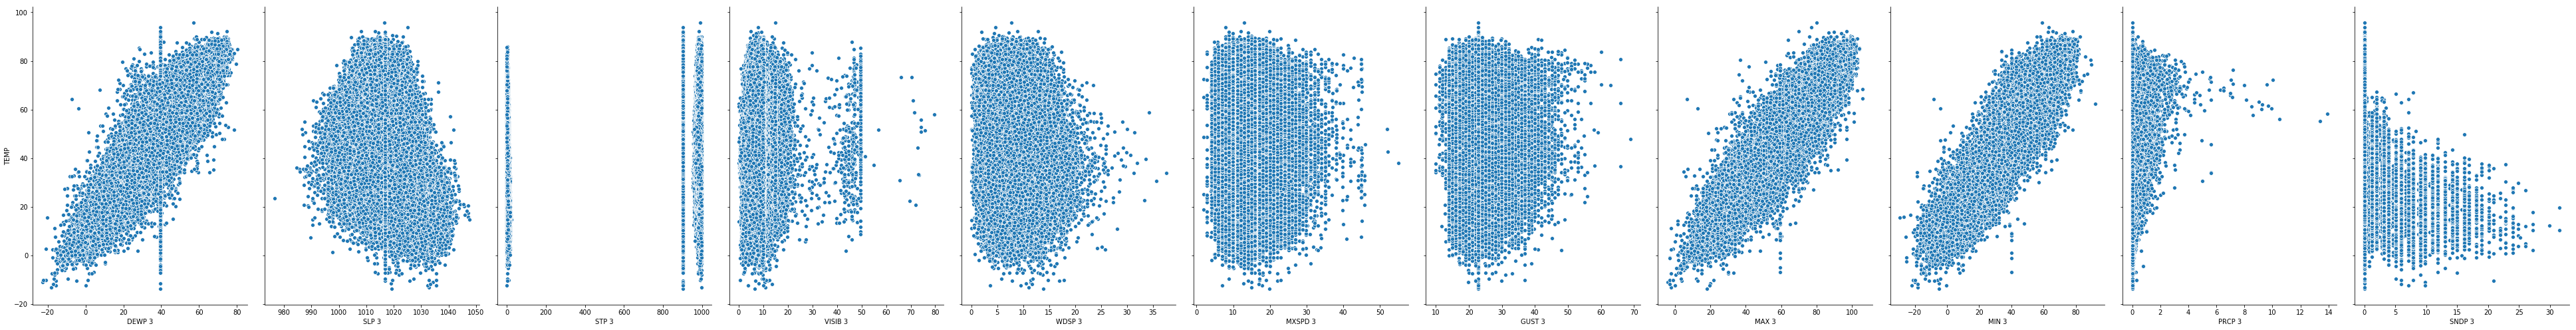

In [20]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['DEWP 3', 'SLP 3', 'STP 3', 'VISIB 3',
       'WDSP 3', 'MXSPD 3', 'GUST 3', 'MAX 3', 'MIN 3', 'PRCP 3', 'SNDP 3'], y_vars='TEMP', height=7, aspect=0.7)

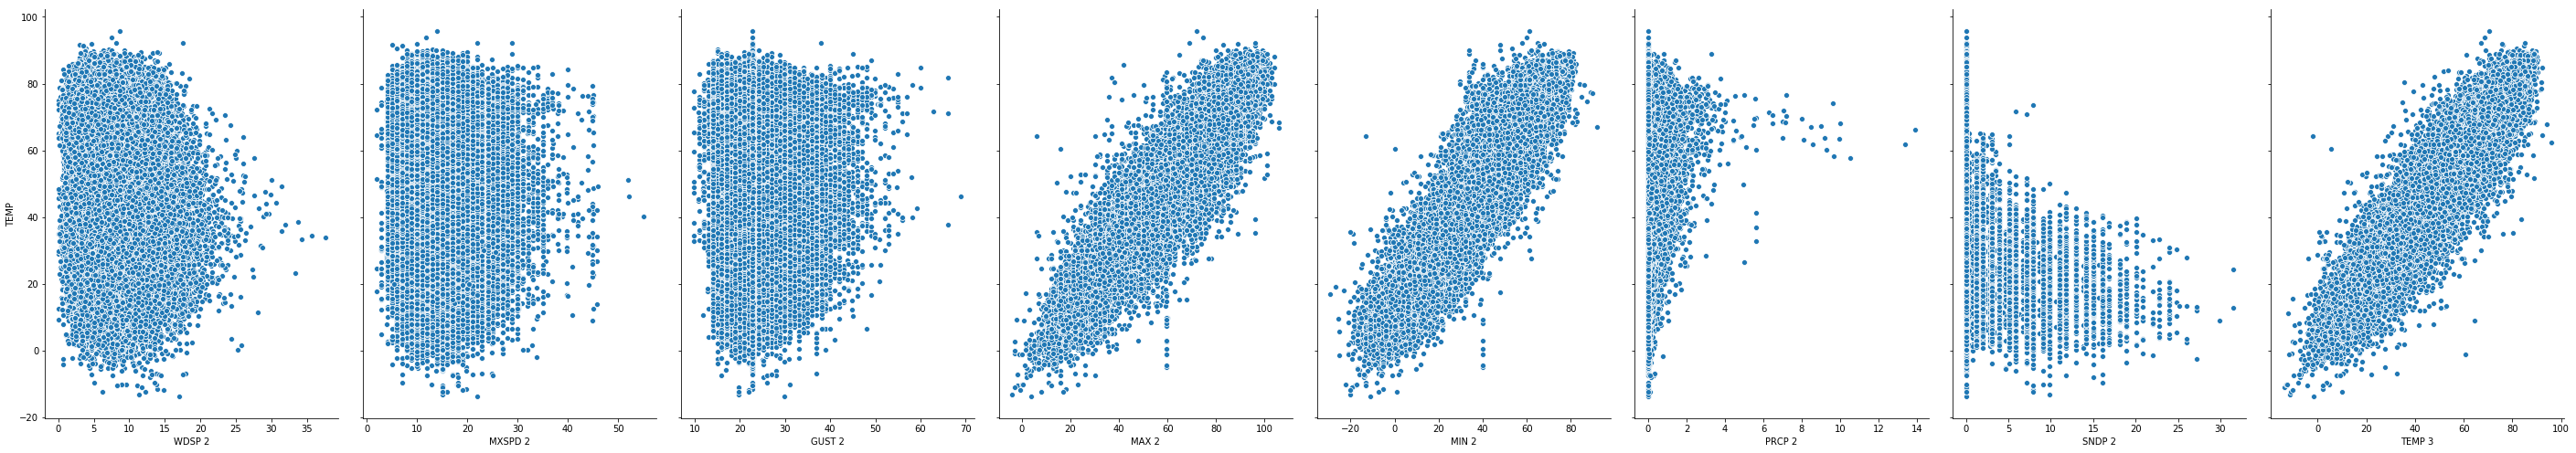

In [21]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['WDSP 2', 'MXSPD 2', 'GUST 2', 'MAX 2', 'MIN 2',
       'PRCP 2', 'SNDP 2', 'TEMP 3'], y_vars='TEMP', height=7, aspect=0.7)

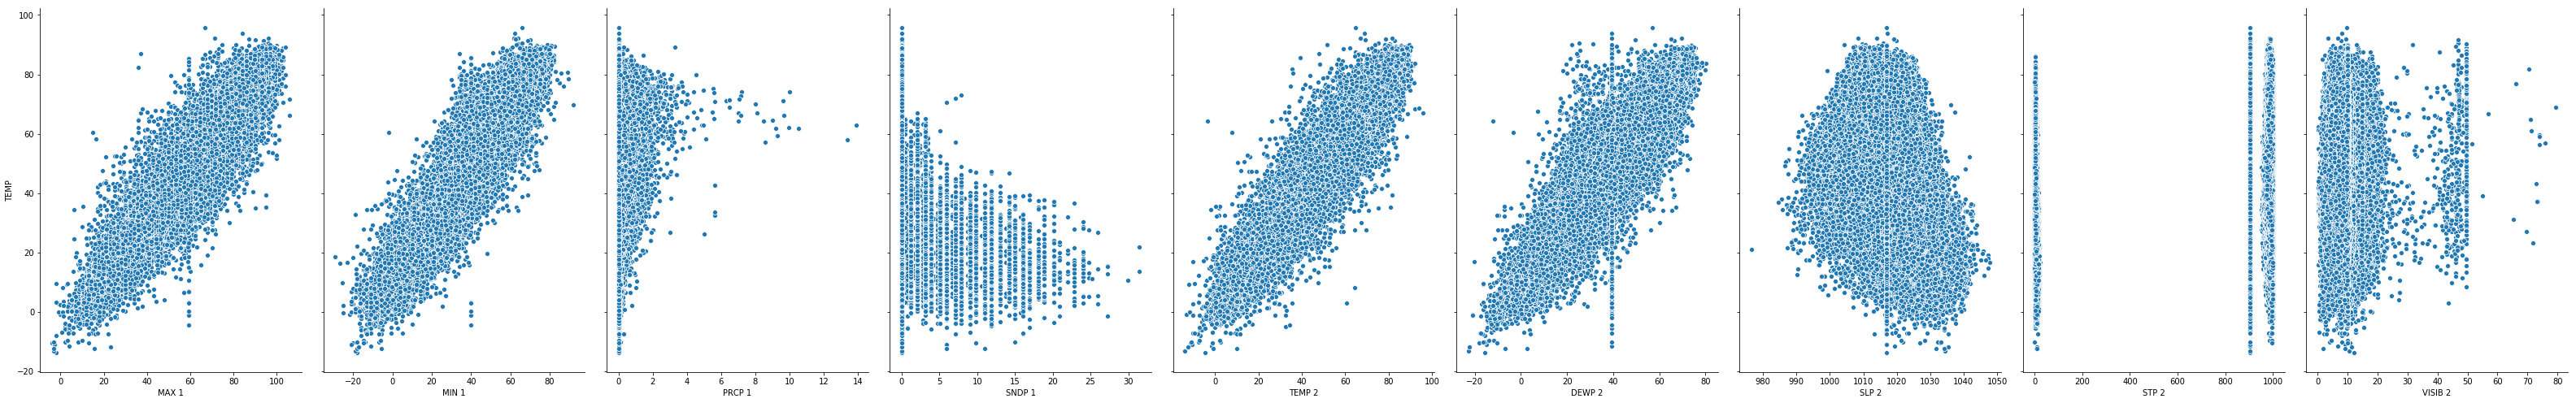

In [22]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['MAX 1', 'MIN 1', 'PRCP 1', 'SNDP 1', 'TEMP 2', 'DEWP 2', 'SLP 2',
       'STP 2', 'VISIB 2'], y_vars='TEMP', height=7, aspect=0.7)

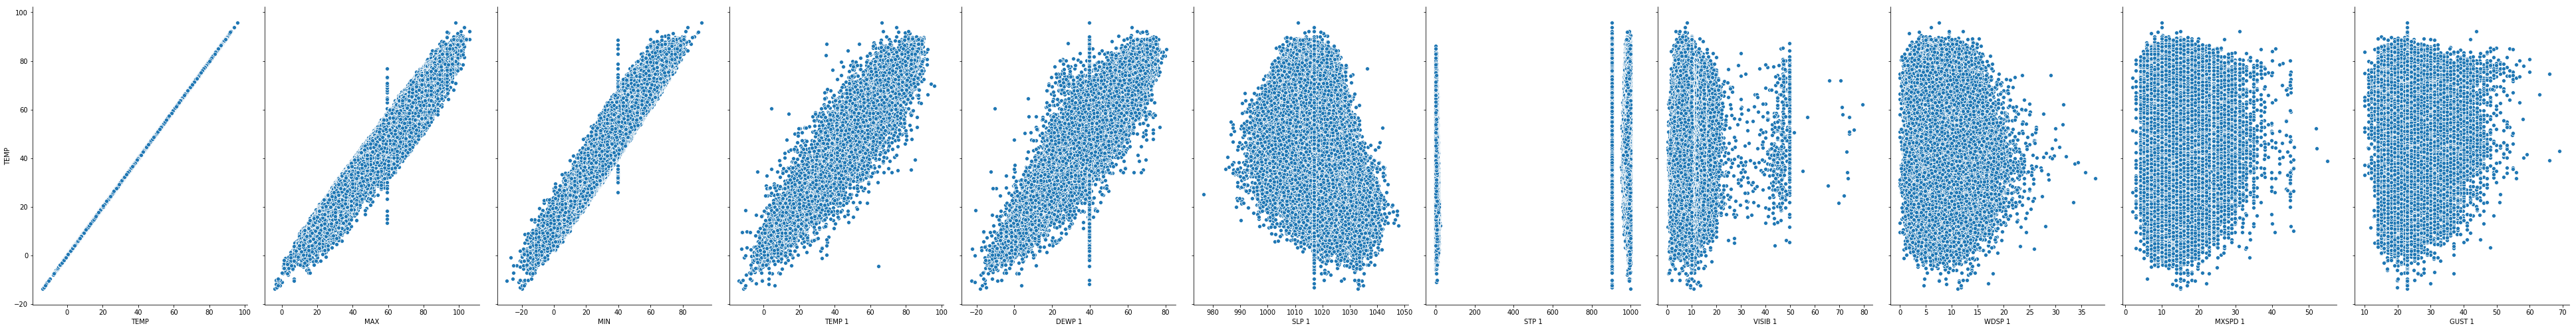

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TEMP','MAX', 'MIN', 'TEMP 1',
       'DEWP 1', 'SLP 1', 'STP 1', 'VISIB 1', 'WDSP 1', 'MXSPD 1', 'GUST 1'], y_vars='TEMP', height=7, aspect=0.7)

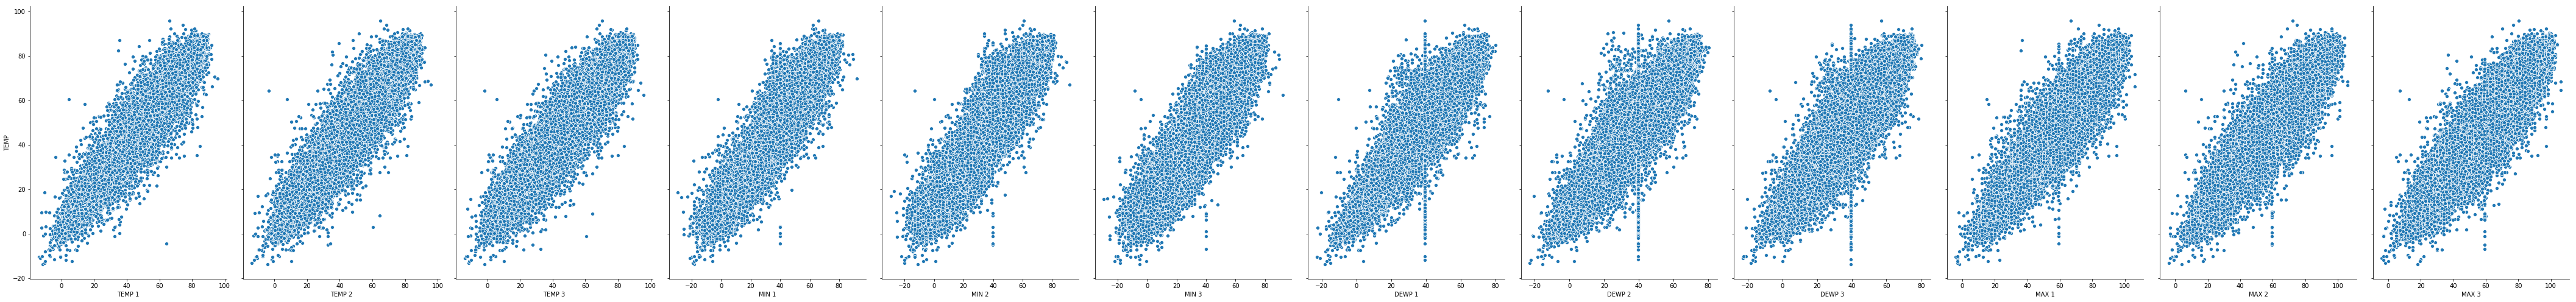

In [24]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["TEMP 1", "TEMP 2", "TEMP 3", "MIN 1", "MIN 2", "MIN 3", "DEWP 1", "DEWP 2", "DEWP 3", "MAX 1", 
             "MAX 2", "MAX 3"], y_vars='TEMP', height=7, aspect=0.7)

In [25]:
# Standardize data #

#drop date and name not needed anymore really
drop_col = [0,2]
temp_data = data.drop(data.columns[drop_col],axis=1)

Z =  (temp_data.iloc[0:temp_data.shape[0], 0:temp_data.shape[1]] - temp_data.iloc[0:temp_data.shape[0], 0:temp_data.shape[1]].mean()) / temp_data.iloc[0:temp_data.shape[0], 0:temp_data.shape[1]].std()
Z.head()

ELEVATION      TEMP          DEWP       SLP           STP     VISIB  \
0   1.823682 -1.787672 -1.801684e+00  1.462746 -3.520873e-13 -1.228668   
1   0.175574 -1.558840 -1.635137e+00  0.961730  4.170737e-01 -0.500937   
2  -0.829891 -1.537554 -1.658109e+00  1.165267  4.405776e-01  1.116244   
3   0.415083 -1.729134 -1.548993e+00  1.180924  4.156911e-01 -1.606010   
4  -1.192712 -1.638665 -8.977397e-15  0.319803 -3.520873e-13 -0.527890   

       WDSP     MXSPD          GUST       MAX    ...        SLP 3     STP 3  \
0  1.136537  0.264758  5.322258e-01 -1.096891    ...          NaN       NaN   
1  2.554252  1.318230  3.032579e-01 -1.052817    ...          NaN       NaN   
2  2.613324  1.528924  1.196233e+00 -0.989155    ...          NaN       NaN   
3  2.908681  1.739619  9.672647e-01 -1.728611    ...     1.462726  0.000009   
4  2.229359  2.540258 -2.757620e-12 -1.537626    ...     0.961715  0.417079   

    VISIB 3    WDSP 3   MXSPD 3    GUST 3     MAX 3     MIN 3    PRCP 3  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3 -1.228669  1.136517  0.264753  0.532207 -1.096916 -1.609904 -0.250717   
4 -0.500944  2.554228  1.318214  0.303238 -1.052843 -1.385920 -0.289049   

     SNDP 3  
0       NaN  
1       NaN  
2       NaN  
3  2.864804  
4 -0.042748  

[5 rows x 49 columns]

In [26]:
## Correlation is determined to see what values are most related to the Mean Temperature for the day ##
Z.corr()[['TEMP']].sort_values('TEMP')

TEMP
SNDP      -0.370312
SNDP 1    -0.365119
SNDP 2    -0.362896
SNDP 3    -0.362567
WDSP 3    -0.266562
SLP       -0.263464
WDSP 2    -0.258499
WDSP 1    -0.251672
SLP 1     -0.249812
SLP 2     -0.238606
WDSP      -0.235960
SLP 3     -0.228440
MXSPD 3   -0.165842
MXSPD 2   -0.159615
MXSPD 1   -0.152835
MXSPD     -0.140065
GUST 3    -0.072895
GUST 2    -0.067249
GUST 1    -0.061500
GUST      -0.054420
ELEVATION -0.007361
VISIB 1    0.060413
VISIB 2    0.067698
VISIB 3    0.068428
PRCP 3     0.071263
PRCP 2     0.077039
PRCP       0.078386
PRCP 1     0.079691
VISIB      0.084513
STP 3      0.178621
STP 2      0.180612
STP 1      0.182377
STP        0.187752
DEWP 3     0.910648
DEWP 2     0.914717
DEWP 1     0.922165
MIN 3      0.929282
MIN 2      0.933817
DEWP       0.935873
MIN 1      0.941229
MAX 3      0.952665
MAX 2      0.955300
MAX 1      0.958317
MIN        0.965707
TEMP 3     0.967236
TEMP 2     0.970777
TEMP 1     0.975924
MAX        0.976633
TEMP       1.000000

In [27]:
# using the charts above and the correlation get to eliminate un-needed cols #
drop_cols = []
for col in range (0, len(data.columns)):
    if (data.columns[col] not in ['TEMP','MAX', 'MIN', 'TEMP 1',
       'DEWP 1', 'SLP 1', 'STP 1', 'VISIB 1', 'WDSP 1', 'MXSPD 1', 'GUST 1',
       'MAX 1', 'MIN 1', 'PRCP 1', 'SNDP 1', 'TEMP 2', 'DEWP 2', 'SLP 2',
       'STP 2', 'VISIB 2', 'WDSP 2', 'MXSPD 2', 'GUST 2', 'MAX 2', 'MIN 2',
       'PRCP 2', 'SNDP 2', 'TEMP 3', 'DEWP 3', 'SLP 3', 'STP 3', 'VISIB 3',
       'WDSP 3', 'MXSPD 3', 'GUST 3', 'MAX 3', 'MIN 3', 'PRCP 3', 'SNDP 3']):
        drop_cols.append(col);
        
data.drop(data.columns[drop_cols],axis=1,inplace=True)
data.head()

TEMP   MAX   MIN  TEMP 1  DEWP 1   SLP 1       STP 1  VISIB 1  WDSP 1  \
0  15.7  37.0  11.1     NaN     NaN     NaN         NaN      NaN     NaN   
1  20.0  37.9  15.1    15.7     8.1  1026.2  903.401397      4.5    11.4   
2  20.4  39.2  15.1    20.0    11.0  1023.0  993.900000      7.2    16.2   
3  16.8  24.1  12.9    20.4    10.6  1024.3  999.000000     13.2    16.4   
4  18.5  28.0  13.1    16.8    12.5  1024.4  993.600000      3.1    17.4   

   MXSPD 1   ...     SLP 3       STP 3  VISIB 3  WDSP 3  MXSPD 3  GUST 3  \
0      NaN   ...       NaN         NaN      NaN     NaN      NaN     NaN   
1     15.0   ...       NaN         NaN      NaN     NaN      NaN     NaN   
2     20.0   ...       NaN         NaN      NaN     NaN      NaN     NaN   
3     21.0   ...    1026.2  903.401397      4.5    11.4     15.0    25.1   
4     22.0   ...    1023.0  993.900000      7.2    16.2     20.0    24.1   

   MAX 3  MIN 3  PRCP 3  SNDP 3  
0    NaN    NaN     NaN     NaN  
1    NaN    NaN     NaN     NaN  
2    NaN    NaN     NaN     NaN  
3   37.0   11.1    0.01     5.9  
4   37.9   15.1    0.00     0.4  

[5 rows x 39 columns]

In [28]:
# my predictors for regression 
# TEMP 1, TEMP 2, TEMP 3, MIN 1, MIN 2, MIN 3, DEWP 1, DEWP 2, DEWP 3, MAX 1, MAX 2, MAX 3
# trim my dataset down to these now and the temp that I want
print(data.shape)
data = data.dropna()
print(data.shape)
value_wanted = data["TEMP"]
cols_wanted = ["TEMP 1", "TEMP 2", "TEMP 3", "MIN 1", "MIN 2", "MIN 3", "DEWP 1", "DEWP 2", "DEWP 3", "MAX 1", 
             "MAX 2", "MAX 3"]
preds = data[cols_wanted]

(126385, 39)
(126382, 39)


In [29]:
# Data pre-processing finally done and ready to apply this data to our linear regression model to predicte TEMP #

X_train, X_test, y_train, y_test = train_test_split(preds, value_wanted, test_size=0.2, random_state=12)

# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
#https://scikit-learn.org/stable/modules/classes.html#regression-metrics
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print(prediction)

The Explained Variance: 0.96
The Mean Absolute Error: 2.53 degrees celsius
The Median Absolute Error: 1.80 degrees celsius
[51.50229514 46.99483951 32.22976088 ... 22.8953912  24.65519504
 63.75343983]
